In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2023-04-20 11:54:20.276338: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-20 11:54:20.300877: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-20 11:54:20.301498: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 11:54:20.761883: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(f'Train size: {len(X_train)}')
print(f'Test size: {len(X_test)}')
print(f'Size of image: {X_train[0].shape}')

Train size: 60000
Test size: 10000
Size of image: (28, 28)


Printing an example image: 


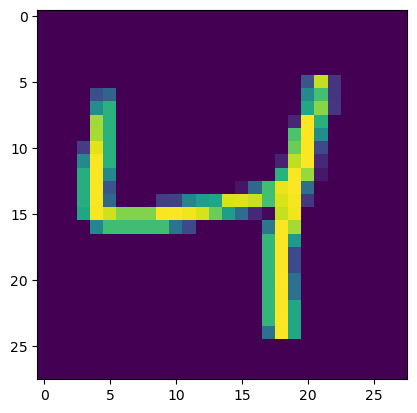

In [5]:
print(f'Printing an example image: ')
plt.imshow(X_train[2])

In [6]:
def SingleLayerModel(X_train, y_train):
    # Build the model
    model = tf.keras.Sequential([
        # Input shape is the size of the image 28 x 28, this layer will flatten it into 28x28 = 784
        tf.keras.layers.Flatten(input_shape = (28, 28)),
        # Single layer, Dense means all the neurons are interconnected with previous layer, units = number of neurons (10 in this case for 10 classes) 
        tf.keras.layers.Dense(units = 10, activation = 'sigmoid') 
    ])

    # Compile before training
    model.compile(
        optimizer = 'adam',
        # sparse_categorical_crossentropy for integer categorical outputs (categorical_crossentropy for one hot encoded categories)
        loss = 'sparse_categorical_crossentropy',  
        metrics = ['accuracy']
    )

    # Train the model
    model.fit(X_train, y_train, epochs = 5)
    return model

In [7]:
model_1 = SingleLayerModel(X_train, y_train)

Epoch 1/5
1875/1875 [==============================] - 1s 660us/step - loss: 10.0328 - accuracy: 0.8373
Epoch 2/5
1875/1875 [==============================] - 1s 620us/step - loss: 6.0395 - accuracy: 0.8785
Epoch 3/5
1875/1875 [==============================] - 1s 662us/step - loss: 5.6983 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 1s 596us/step - loss: 5.5893 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 1s 603us/step - loss: 5.5154 - accuracy: 0.8867


In [8]:
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 0s 470us/step - loss: 5.4448 - accuracy: 0.8950


[5.444810390472412, 0.8949999809265137]

In [9]:
# Train with normalized data
X_train_normalized, X_test_normalized = X_train / 255.0, X_test / 255.0
model_2 = SingleLayerModel(X_train_normalized, y_train)

Epoch 1/5
1875/1875 [==============================] - 1s 566us/step - loss: 0.4700 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 1s 534us/step - loss: 0.3039 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 1s 571us/step - loss: 0.2839 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 593us/step - loss: 0.2729 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 1s 606us/step - loss: 0.2667 - accuracy: 0.9251


In [10]:
model_2.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 517us/step - loss: 0.2664 - accuracy: 0.9265


[0.26640400290489197, 0.9265000224113464]

In [11]:
# Add hidden layers
def MultiLayerModel(X_train, y_train):
    # Build the model
    model = tf.keras.Sequential([
        # Input shape is the size of the image 28 x 28, this layer will flatten it into 28x28 = 784
        tf.keras.layers.Flatten(input_shape = (28, 28)),
        # Hidden layer, no need to specify input shape, units = number of neurons
        tf.keras.layers.Dense(units = 100, activation = 'relu'),
        # Single layer, Dense means all the neurons are interconnected with previous layer, units = number of neurons (10 in this case for 10 classes) 
        tf.keras.layers.Dense(units = 10, activation = 'sigmoid') 
    ])

    # Compile before training
    model.compile(
        optimizer = 'adam',
        # sparse_categorical_crossentropy for integer categorical outputs (categorical_crossentropy for one hot encoded categories)
        loss = 'sparse_categorical_crossentropy',  
        metrics = ['accuracy']
    )

    # Train the model
    model.fit(X_train, y_train, epochs = 5)
    return model

In [12]:
model_3 = MultiLayerModel(X_train, y_train)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1160 - accuracy: 0.8291
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4159 - accuracy: 0.9021
Epoch 3/5
1875/1875 [==============================] - 2s 970us/step - loss: 0.2973 - accuracy: 0.9252
Epoch 4/5
1875/1875 [==============================] - 2s 949us/step - loss: 0.2531 - accuracy: 0.9371
Epoch 5/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.2296 - accuracy: 0.9431


In [13]:
model_3.evaluate(X_test, y_test)

313/313 [==============================] - 0s 634us/step - loss: 0.2458 - accuracy: 0.9454


[0.2458166927099228, 0.9453999996185303]

In [14]:
# Train with normalized data
model_4 = MultiLayerModel(X_train_normalized, y_train)

Epoch 1/5
1875/1875 [==============================] - 2s 981us/step - loss: 0.2703 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 2s 984us/step - loss: 0.1241 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 2s 955us/step - loss: 0.0867 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.0667 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 934us/step - loss: 0.0536 - accuracy: 0.9832


In [15]:
model_4.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 623us/step - loss: 0.0765 - accuracy: 0.9770


[0.076529860496521, 0.9769999980926514]

In [19]:
np.argmax(model_4.predict(X_test_normalized)[0])

313/313 [==============================] - 0s 505us/step


7

In [20]:
y_test[0]

7